In [1]:
# Setup Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup Dataset Path
DATA_PATH = '../data/raw/RSRP.csv'

In [3]:
# load Data
df = pd.read_csv(DATA_PATH)

In [4]:
# Let Explore
df.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
0,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,D728W
1,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
2,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,D728W
3,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
4,2019-11-02 00:11:26.822 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,D728W


In [5]:
df.tail()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
2725348,2019-11-03 22:30:32.181 +0300,24.812230,46.752800,Mobile,Saudi Arabia,4G,Operator A,-81,Enabled,samsung,Galaxy A20S
2725349,2019-11-03 22:33:39.525 +0300,24.812230,46.752800,Mobile,Saudi Arabia,4G,Operator A,-90,Enabled,samsung,Galaxy A20S
2725350,2019-11-03 14:36:57.390 +0300,24.773191,46.654728,WiFi,Saudi Arabia,4G,Operator A,-99,Enabled,HUAWEI,Mate 8
2725351,2019-11-03 17:02:08.409 +0300,24.774273,46.773990,Mobile,Saudi Arabia,4G,Operator A,-111,Enabled,HUAWEI,Mate 8
2725352,2019-11-03 18:05:05.029 +0300,24.774136,46.774260,Mobile,Saudi Arabia,4G,Operator A,-88,Enabled,HUAWEI,Mate 8


In [6]:
print("Total Number of Rows : {}".format(df.shape[0]))
print("Total Number of Features : {}".format(df.shape[1]))

Total Number of Rows : 2725353
Total Number of Features : 11


In [7]:
# Show uniqe values of each column
for i in range(df.shape[1]):
    print("###########################     {}    ###########################".format(df.columns[i]))
    print(df.iloc[:,i].unique())
    print(" ")
    print(" ")

###########################     Timestamp    ###########################
['2019-11-02 00:09:29.386 +0300' '2019-11-02 00:10:45.323 +0300'
 '2019-11-02 00:11:26.822 +0300' ... '2019-11-03 14:36:57.390 +0300'
 '2019-11-03 17:02:08.409 +0300' '2019-11-03 18:05:05.029 +0300']
 
 
###########################     LocationLatitude    ###########################
[24.54054  24.691517 24.612879 ... 24.492819 24.492523 24.492239]
 
 
###########################     LocationLongitude    ###########################
[46.784737 46.65258  46.857464 ... 46.93801  46.93864  46.938698]
 
 
###########################     RadioConnectionType    ###########################
['Mobile' 'Unknown' 'WiFi']
 
 
###########################     Country    ###########################
['Saudi Arabia' nan]
 
 
###########################     RadioNetworkGeneration    ###########################
['4G' '3G' '2G' 'Unknown' 'WiFi']
 
 
###########################     RadioOperatorName    ###########################
['Oper

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


In [ ]:
# Different time zone lead to dtype become object instead of datetime and Saudi Arabia have one time zone '+3'
temp = pd.DataFrame(df['Timestamp'].loc[522:523])
temp

,Timestamp
522,2019-11-02 00:22:37.206 +0600
523,2019-11-02 00:28:59.813 +0300


In [10]:
# Missing Values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
Country,156,0.000057
Timestamp,0,0.000000
LocationLatitude,0,0.000000
LocationLongitude,0,0.000000
RadioConnectionType,0,0.000000
RadioNetworkGeneration,0,0.000000
RadioOperatorName,0,0.000000
RSRP,0,0.000000
RadioMobileDataEnabled,0,0.000000
DeviceManufacturer,0,0.000000


In [11]:
#Count of rows that contain value 'Unknown'
for column in df.columns:
    print('{} : '.format(column) + str(sum(df[column] == 'Unknown')))

Timestamp : 0
LocationLatitude : 0
LocationLongitude : 0
RadioConnectionType : 668
Country : 0
RadioNetworkGeneration : 17361
RadioOperatorName : 0
RSRP : 0
RadioMobileDataEnabled : 0
DeviceManufacturer : 0
DeviceName : 0


In [12]:
#check duplicate rows
def check_duplicate(data):
    duplicate = data.duplicated()
    unique_data  = pd.Series(data.shape[0] - duplicate.value_counts()[1])
    duplicate_data = pd.Series(data.shape[0] - duplicate.value_counts()[0])
    unique_data_percent = pd.Series((unique_data/data.shape[0])*100)
    duplicate_data_percent = pd.Series((duplicate_data/data.shape[0])*100)
    dub = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    return dub

check_duplicate(df)

,Unique Count,Duplicate Count,Unique percent,Duplicate Percent
0,2723541,1812,99.933513,0.066487


<AxesSubplot:>

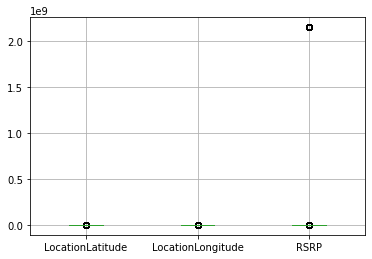

In [13]:
df.boxplot()

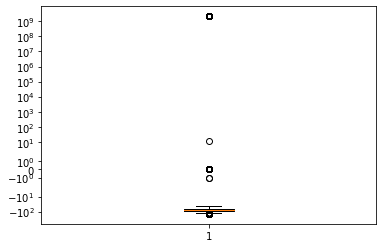

<Figure size 720x720 with 0 Axes>

In [14]:
plt.boxplot(df['RSRP'])
plt.yscale('symlog')
plt.figure(figsize=(10,10))
plt.show()

In [20]:
# Calculate Q1 (25th percentile of the data) for the given feature
Q1 = np.percentile(df['RSRP'], 25)

# Calculate Q3 (75th percentile of the data) for the given feature
Q3 = np.percentile(df['RSRP'], 75)

# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
step = 1.5 * (Q3 - Q1)

# Display the outliers
print ("Data points considered outliers for the feature '{}':".format('RSRP'))
feature_outliers = df[~((df['RSRP']>= Q1 - step) & (df['RSRP'] <= Q3 + step))]
print("")
print(feature_outliers['RSRP'].unique())
print("")
print("Number of total outliers : {} ".format(feature_outliers['RSRP'].shape[0]))

Data points considered outliers for the feature 'RSRP':

[2147483647          0       -131       -140       -132       -133
       -134       -136         12       -130       -135       -138
         -1]

Number of total outliers : 644457 


# Conclusion and Recommended actions

- Convert Timestamp to datetime instead of object
- there are 156 blank value in country column should imputed by 'Saudi Arabia' 
- there are 668 Unknown value in RadioConnectionType column
- there are 17361 Unknown value in RadioNetworkGeneration column
- there are 1812 Duplicate rows should be dropped
- RSRP Column has outliers values should deal with them